In [1]:
import pandas as pd
from dotenv import load_dotenv
import os
from os.path import join, dirname

In [2]:
import tweepy

In [3]:
from tweepy.api import API
from tweepy.auth import AppAuthHandler, OAuthHandler
from tweepy.cache import Cache, FileCache, MemoryCache
from tweepy.cursor import Cursor
from tweepy.error import RateLimitError, TweepError
from tweepy.models import DirectMessage, Friendship, ModelFactory, SavedSearch, SearchResults, Status, User
from tweepy.streaming import Stream, StreamListener

In [4]:
from time import sleep
from datetime import datetime
from textblob import TextBlob 
import matplotlib.pyplot as plt 
%matplotlib inline

In [5]:
#cargando los tokens para API Twitter

dotenv_path = join(("trabajo_final"), '.env')
load_dotenv(dotenv_path)

consumer_key = os.environ.get("consumer_key")
consumer_secret = os.environ.get("consumer_secret")
access_token = os.environ.get("access_token")
access_token_secret = os.environ.get("access_token_secret")

In [6]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [7]:
print(api.me().name)

TweepError: Failed to send request: Only unicode objects are escapable. Got None of type <class 'NoneType'>.

In [32]:
def debug(enable=True, level=1):
    from six.moves.http_client import HTTPConnection
    HTTPConnection.debuglevel = level

In [53]:
palabra = input("Buscar: ")
numero_de_Tweets = int(input(u"Número de tweets a capturar: "))
lenguaje = input("Idioma [es/en]:")

Buscar: nadal
Número de tweets a capturar: 100
Idioma [es/en]:es


In [54]:
def ObtenerTweets(palabra="Nadal",times=100,leguanje="es"):
    #Se define las listas que capturan la popularidad
    popularidad_list = []
    numeros_list = []
    numero = 1
    for tweet in tweepy.Cursor(api.search, palabra, lang=lenguaje).items(numero_de_Tweets):
        try:
            #Se toma el texto, se hace el analisis de sentimiento
            #y se agrega el resultado a las listas
            analisis = TextBlob(tweet.text)
            analisis = analisis.sentiment
            popularidad = analisis.polarity
            popularidad_list.append(popularidad)
            numeros_list.append(numero)
            numero = numero + 1

        except tweepy.TweepError as e:
            print(e.reason)

        except StopIteration:
            break
    return (numeros_list,popularidad_list,numero)

In [55]:
def GraficarDatos(numeros_list,popularidad_list,numero):
    axes = plt.gca()
    axes.set_ylim([-1, 2])
    
    plt.scatter(numeros_list, popularidad_list)
    popularidadPromedio = (sum(popularidad_list))/(len(popularidad_list))
    popularidadPromedio = "{0:.0f}%".format(popularidadPromedio * 100)
    time  = datetime.now().strftime("A : %H:%M\n El: %m-%d-%y")
    plt.text(0, 1.25, 
             "Sentimiento promedio:  " + str(popularidadPromedio) + "\n" + time, 
             fontsize=12, 
             bbox = dict(facecolor='none', 
                         edgecolor='black', 
                         boxstyle='square, pad = 1'))
    
    plt.title("Sentimientos sobre " + palabra + " en twitter")
    plt.xlabel("Numero de tweets")
    plt.ylabel("Sentimiento")
    plt.show()

In [56]:
 numeros_list,popularidad_list,numero = ObtenerTweets(palabra,numero_de_Tweets,lenguaje)

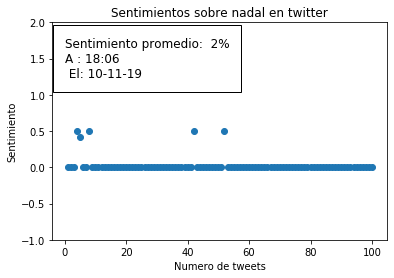

In [57]:
 GraficarDatos(numeros_list,popularidad_list,numero)